In [120]:
import numpy as np
import pandas as pd
import tensorflow as tf 
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.utils import shuffle
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Layer, Input
from sklearn.model_selection import train_test_split

In [121]:
def t(P, S):
    A = 130.7
    B = 0.25 
    V = 1e-5
    tg = 10000
    
    J = A * S * np.exp(-B/np.log(S)**2)
    t = np.round((np.log(1-P))/(-J*V),0)+tg
    return t 

In [122]:
def data_generator(S, sample):
    P =np.random.rand(samples)
    return t(P, S)

In [118]:
df = pd.read_csv('neural_network_data.csv')
df

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

In [109]:
print(df.shape)

(2195, 39)


In [110]:
# Use numpy to convert to arrays
import numpy as np
# outcomes are the values we want to predict
outcomes = np.array(Dataset['Induction Time'])
# Remove the outcomes from the parameters (data needed for making the prediction)
# axis 1 refers to the columns
features = Dataset.drop(['Solute', 'SMILES', 'Volume mL', 'Agitation Rate RPM', 'Temperature', 'Supersaturation Ration'], axis = 1)
# Saving feature names for later use
features_list = list(features.columns)
# Convert to numpy array
features_list = np.array(features_list)

NameError: name 'Dataset' is not defined

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

x = features
y = outcomes

acc_array = list()
clf_array = list()
xy_array = list()

for i in range(1000):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
        
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    #calculate accuracy of the model
    acc = metrics.accuracy_score(y_test, y_pred)
    
    acc_array.append(acc)
    clf_array.append(clf)
    xy_array.append([x_train, x_test, y_train, y_test])
    
#print('Accuracy: ', acc)   
print('minimal accuracy =', np.min(acc_array))
print('maximal accuracy =', np.max(acc_array))
print('mean accuracy =', np.mean(acc_array))
print('SD =', np.std(acc_array))

NameError: name 'features' is not defined

In [98]:
S_vals = np.arange(1.4, 2, 0.05)
S_arr = np.array([])
t_arr = np.array([])

for S in S_vals:
    S_arr = np.append(S_arr, np.full(samples,S))
    t_arr = np.append(t_arr, data_generator(S, samples))
    
    S_arr, t_arr =shuffle(S_arr, t_arr)
    S_test = np.arange(1.4, 2, 0.05)

TypeError: float() argument must be a string or a number, not 'function'

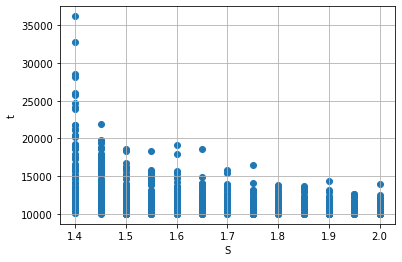

In [95]:
plt.grid(True)
plt.xlabel('S')
plt.ylabel('t')
plt.scatter(S_arr, t_arr, label = 'sampled data')
plt.plot(t_50, c='m', label = 't50')
plt.plot(S_vals, list(map(t, S_vals)), c = 'm', label = 'f(x)')
plt.legend(loc = 'upper center')
plt.show()

In [84]:
#configure the optimizer 
epochs = 500
batch_size = 50
learning_rate = 0.01
log_t_arr =np.log(t_arr)

In [2]:
model = Sequential()
model.add(Dense(12,input_shape=(1,),activation="tanh"))
model.add(Dense(12,activation="tanh")
model.add(Dense(12,activation="tanh")
model.add(Dense(1,activation="linear")
adamOptimizer = tf.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='mse',optimizer=adamOptimizer,metrics=['mse'])
history_cache = model.fit(S_arr, log_t_arr, verbose=0, epochs=epoches, batch_size=batch_size)
                model.summary()

SyntaxError: invalid syntax (<ipython-input-2-a298f121cc24>, line 4)

In [60]:
def model():
    model = Sequential()

In [61]:
def predict():
    t_predict = np.exp(model.predicts(S_test))

In [62]:
t_pred = np.exp(model.predict(S_test))
plt.grid(True)
plt.xlabel('S')
plt.ylabel('log (t)')
plt.scatter(S_arr, np.log(t_arr), label = 'sampled data')
plt.scatter(S_test,np.log(t_pred), c='r', label='predicted values')
plt.plot(np.log(t_50), c='m', label = 't50')
plt.legend(loc='upper center',fontsize='large',shadow=True)
plt.show()

AttributeError: 'function' object has no attribute 'predict'

In [92]:
def mdn_cost(mu, sigma, y):
    dist = tfp.distributions.Normal(loc=mu, scale=sigma)
return tf.reduce_mean(-dist.log_prob(y))

SyntaxError: 'return' outside function (3876698598.py, line 3)

In [93]:
epochs = 500
batch_size = 50
learning_rate = 0.001
log_t_arr = np.log(t_arr)
InputLayer = Input(shape=(1,))
Layer_1 = Dense(12,activation=\"tanh\")(InputLayer)
Layer_2 = Dense(12,activation=\"tanh\")(Layer_1)
Layer_3 = Dense(12,activation=\"tanh\")(Layer_2)
mu = Dense(1, activation="\"linear\")(Layer_3)
sigma = Dense(1, activation=lambda x: tf.nn.elu(x) + 1)(Layer_3)
y_real = Input(shape=(1,))
lossF = mdn_cost(mu,sigma,y_real)
model = Model(inputs=[InputLayer, y_real], outputs=[mu, sigma])
model.add_loss(lossF)
adamOptimizer = tf.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=adamOptimizer,metrics=['mse'])
history_cache = model.fit([S_arr, log_t_arr]
#notice we are using an input to pass the real values due to the inner workings of keras
verbose=0,
# write =1 if you wish to see the progress for each epoch\n",
epochs=epochs
batch_size=batch_size)
print('Final cost: {0:.4f}'.format(history_cache.history['loss'][-1]))


SyntaxError: unexpected character after line continuation character (2516201029.py, line 6)

In [76]:
mu_pred, sigma_pred = model.predict(list((S_test,S_test))) 
# the model expects a list of arrays as it has 2 inputs
df = pd.concat([pd.DataFrame(data=mu_pred, columns = ['mu_pred'])
pd.DataFrame(data=sigma_pred, columns = ['sigma_pred'])], axis = 1)

SyntaxError: invalid syntax (2766377210.py, line 4)

In [ ]:
mu_pred, sigma_pred = model.predict(list((S_test,S_test)))
# the model expects a list of arrays as it has 2 inputs
df = pd.concat([pd.DataFrame(data=mu_pred
columns = ['mu_pred'])
pd.DataFrame(data=sigma_pred, columns = ['sigma_pred'])], axis = 1)


In [ ]:
plt.grid(True)
plt.xlabel('S')
plt.ylabel('log (t)')
plt.scatter(S_arr, np.log(t_arr), label = 'sampled data')
plt.errorbar(S_test, df['mu_pred'], yerr=df['sigma_pred']
             xerr=None,c='r',ls='None',marker='.',ms=10,label='predicted distributions')
plt.plot(np.log(t_50), c='m', label = 't50')
plt.legend(loc='upper center',fontsize='large',shadow=True)
plt.show()

